适合黑色卡号的银行卡

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

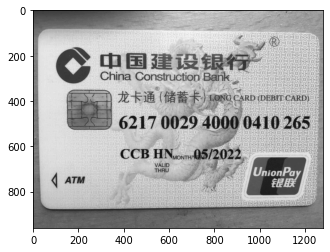

In [3]:
img = cv2.imread('img/card1.jpg', 0)
plt.imshow(img, 'gray')

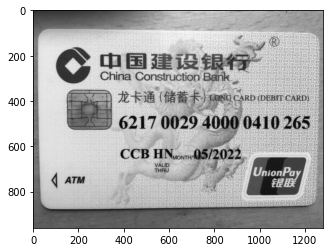

In [24]:
# 高斯模糊,通常用它来减少图像噪声以及降低细节层次。
blur = cv2.GaussianBlur(img, (3, 3), 0)
plt.imshow(blur, 'gray')

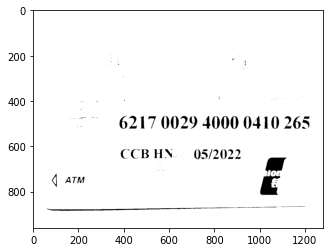

In [25]:
# 二值化
ret, binary = cv2.threshold(blur, 50, 255, cv2.THRESH_BINARY)
plt.imshow(binary, 'gray')

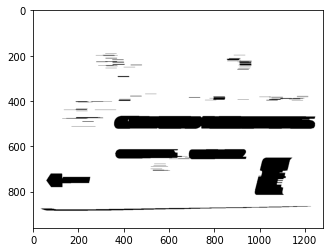

In [26]:
# 膨胀腐蚀
# 膨胀就是求局部最大值的操作。从数学角度来说，就是将图像与核进行卷积，计算核B覆盖区域的像素点的最大值，
# 并把这个最大值赋值给参考点指定的元素。这样就会使图像中的高亮区域逐渐增长。
# 腐蚀和膨胀是相反的操作，腐蚀是求局部最小值的操作。腐蚀操作会使图像中的高亮区逐渐减小。
kernel = np.ones((1, 50), np.uint8) # 根据银行卡号的形状特征，确定了1x50的核
erosion = cv2.erode(binary, kernel)
plt.imshow(erosion, 'gray')

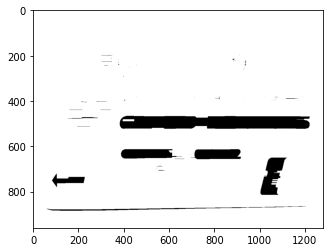

In [27]:
dilation = cv2.dilate(erosion, kernel)
plt.imshow(dilation, 'gray')

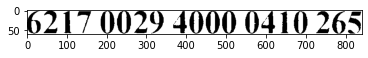

In [28]:
# 定位
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
sp = dilation.shape
x, y, w, h = 0, 0, 0, 0
for i in range(0, len(contours)):
    x, y, w, h = cv2.boundingRect(contours[i])
    if h > sp[0]*0.05 and w > sp[1]*0.5 and y > sp[0]*0.02 and y < sp[0]*0.8 and w/h > 5:
        img = binary[y:y+h, x:x+w]
        break

plt.imshow(img, 'gray')

In [9]:
def num_split(img):
    height, width = img.shape
    v = [0] * width
    z = [0] * height
    a = 0

    # 垂直投影：统计并存储每一列的黑点数
    for x in range(0, width):
        for y in range(0, height):
            if img[y, x] == 255:
                continue
            else:
                a = a + 1
        v[x] = a
        a = 0

    # 创建空白图片，绘制垂直投影图
    l = len(v)
    emptyImage = np.full((height, width), 255, dtype=np.uint8)
    for x in range(0, width):
        for y in range(0, v[x]):
            emptyImage[y, x] = 0

    #分割字符
    Position = []
    Wstart = 0
    Wend = 0
    W_Start = 0
    W_End = 0
    v[0], v[len(v)-1] = 0, 0
    for j in range(len(v)):
        if v[j] > 0 and Wstart == 0:
            W_Start = j
            Wstart = 1
            Wend = 0
        if v[j] <= 0 and Wstart == 1:
            W_End = j
            Wstart = 0
            Wend = 1
        if Wend == 1:
            Position.append([W_Start, 0, W_End, height])
            Wend = 0

    data = []
    for m in range(len(Position)):
        temp_img = img[Position[m][1]:Position[m][3], Position[m][0]:Position[m][2]]

        h1, w1 = temp_img.shape
        if w1 > h1:
            return []
        temp_img = cv2.resize(temp_img, (16, 16))

        h0, w0 = temp_img.shape
        temp_data = []
        for hx in range(h0):
            for wx in range(w0):
                temp_data.append(float(temp_img[hx, wx]))
        data.append(temp_data)

    return data